## Computer Animation (D term)
- Professor: Cliff Lindsay (BS - UCSD, PhD - WPI '13)
    - Early on: interested in Game Rendering (real-time): Materials, BRDFs, different Algorithms
    - Dissertation: Programmable Camera Architecture & Interface ("Camera Shaders")
    - Now doing medical imaging, motion tracking, spectral ranges, and other camera stuff
    - Old website: https://users.wpi.edu/~clindsay/index.html


- Course covers:
    - Interpolation techniques
    - Forward & inverse kinematics (not in much depth)
    - Physics and behavioral based animation
    - Computational issues
    - History
    - Production tech.
    - Motion Capture
    - "Do some cool stuff!"

- Assessment
    - Weekly quizzes (20%) - Thursdays
    - Weekly paper summaries (20%)
    - Regular programming projects (30%) - 4x
    - Final project (30%) - Done in groups of two, go deeper into one/more areas
        - E.g: CLoth modelling, walk cycle, particle physics, simulations, image blending/warping
- The book: Rick Parent 3rd addition
    - Only real book on animation algorithms that isn't about techniques

1st project due this Friday.

He recommends using Unity or C++ or Java, but we should feel free to use WebGL or Python

### History of animation
... (some older stuff - Zoetropes, etc.)

- Snow White and the 7 dwarves - 1937
    - start of the Cel-animation revolution
- 1957 -1st analog computer viz
- 1961 - first digital computer animation (also 1st dig. game: space wars
- 1965 - 1st animation language - BEFLEX
- 1973 - Westworld
- ...

##### Early computer animation:
- Ed Catmull created a hand animation for his classes 1973?

##### Definitions
- **Animate**: To give life to, or cause to come alive
- **Persistance of vision**: individual frames shown quickly enough will appear to possess continuous motion (need about 24fps)
- **Presentation**: A film consisting of one or more acts
- **Act**: an episode with an associated staging area consisting of many scenes
- **Scene**: a venue of continuous action consisting of one or more shots
- **shot**: a continuous camera recording creating multiple frames
- **Frame**: An individual picture
- **Motion Control**: Computer specification of changes in shape, position, orientation, and other object attributes
- **Flying Logos**: Simple animation of the position/orientation of rigid objects
- **Splines**: Paramentric equation used throughout motion spec.
- **Articulated Motion**: Connected components whose motion are interrelated
- **Free form deformation**: non-rigid object creation and modification
- **Rigid**: When something doesn't change shape or size (only location and rotation)
- **Procedural animation**: Mathematical model used to control motion
- **Stochastic animation**: Statistical/random techniques for object creation/motion. (*Stochastic* basically means random - it comes from German. The original Greek *stokhos* originally meant aim)
- **Behavioral Animation**: Specify motion as interaction with environment (boids, flocks)
- **Kinematics**: Study of geometric and time-related properties of motions
- **Forward kinematics**: Given joint angles and link lengths, where is the end?
- **Inverse kinematics**: Given end and link lengths, what should joint angles be?

Rotation about the Z axis:

About X:
1 0 0 0
0 cos -sin 0
0 sin cos 0
0 0 0 1

General rotations are performed using consecutive  rotations around axis using 'Euler angles'.

### Interpolation Values

Interpolation v. Approximation

Complexity: Cubic
Continuity: First Degree (tangential)
Local v. global control: local (local is better than global because it allows us to control an area independently.
Information requirements: Tangents needed?

- **Approximation** is like interpolation, but doesn't necessarily pass through all the points. We usually use interpolation
- **Complexity**: We usually use a *cubic* spline because it's a good balance btween speed and smoothness.
- **Continuity**: 2nd order is usually good enough - positional and tangential continuity (e.g. we care about displacement and velocity, but disjoint acceleration is usually okay (Jerk: 3rd derivative, Snap: 4th derivative)
- **Local v. Global**: Local is better because it means we don't need to change the whole curve.
- **Information Requirements**: (for different algorithms)
    - Just the points
    - Tangents (each point has a velocity)
    - Interior control points (extra points!. Some algorithms don't like having too many points)
    - Just beginning and ending targets ('velocity' at beginning and end)

In determining lengths between two points along a curve, we use 'arc lengths' ($S$). 

1. some_point_on_path = $U(s)$ - note: constant paramaterization (linear s) doesn't mean constant length.
2. where arc length s is a function of time (e.g. $s = \text{ease}(t)$)

#### Computing arc length:
- Analytic: (a pain to do)
- Forward differencing:
    - Supersampling
    - Adaptive approach
- Numerically:
    - Adaptive Gaussian
You start by reparameterizing the curve - a mapping between a parametric value and the arc length.

It's also helpful to find a parametric value when given the arc length.

##### Arc length Estimation: FD (Forward differencing)
Let's say we've got a table of (index, parameter like u, arc length). (We need to build an annoyingly long table first)
```python
    # We're going between two points, located at 0 and 1
    # d = distance between parameters in the table
    # v = parametric value we want to get the arc length at
    index = floor(v/d + )#0.5) # Just rounding v/d
    
    # apply linear interpolation
    return table[index] + (table[index+1]-table[index]) * (v-table_u[index])/(table_u[index+1]-table_u[index])
    
```
###### Adaptive approach
We have our table, but it has adaptive level of detail depending on curvature.

Find two points, and then find their midpoint. (e.g. $u_1$=0, $u_2$=0.1, $u_{mid}$=0.05)

The three points form a triangle, and the error corresponds to the area of the triangle (or some other metric like length of two short sides minus long side)

If the error is too large, you increase the level of detail put into the table. The general idea is to get the segments small enough to approximate a straight line.

This can run into issues when you have a sine-wave like shape and you want to determine the error. To fix this, you arbitrarily add a number of subdivisions before switching to error calculations.

This potentially has a much smaller table.


### Speed control
- Time-distance function
- Ease in
    - cubic
    - sinusoidal
    - sinusoidal segmented
    - constant acceleration
- General distance-time functions

##### Let Distance = $S(t)$
This is sort of a generic function - it doesn't have to be eae in/ease out.
Usually we think of it as a monotonic, continuous function

###### **Sinusoidal:**
Goes from $-\pi/2$ to $\pi/2$ (the increasing part of `sin()`)

`ease(t) = (sin(pi(t-0.5))+1)/2`

**Sinusoidal segmented**
You can also have `sin()` until we reach `sin(0)`, then add in a line, then add in the rest of the sine function. This allows us to ease in and out, but have a linear chunk in between. Depending on how long the middle part is, the user can control how smooth it is.

###### Single cubic
Let's start with:
$s=-2t^3+3t^2$
(it approximates sine/segmented sine)

It's pretty smooth, but doesn't actually become completely straight.

##### Constant acceleration:
Instead of having a time/distance curve, let's have a time/acceleration curve. (probably a pretty simple one: constant or maybe linear)

It's pretty reasonable to specify a piecewise acceleration function:
```python
acceleration = lambda(t): 1 if t in [0,0.2] else 0 if t in [0.2,0.8] else -1
```
So you sort of get a trapezoidal shape for velocity (which is easy to solve for/tweak via acceleration parameters), and a nice ease-in/out for distance.


## March 23
### Representing rotations
#### Euler angles: Roll, Pitch, Yaw
Performed in this order:
roll (z), pitch (x), yaw (y)

This can cause Gimbal Lock, and is difficult to perform interpolations
#### Angle and Axis representation

#### Quaternions
https://en.wikipedia.org/wiki/Quaternions_and_spatial_rotation

It's a scalar and a *unit* vector. You can think of it as a point on a 4D unit sphere...


- q = [s,v]
- [s,v] = [-s, -v]
- [s1, v1] + [s2, v2] = [s1 + s2, v1 + v2]
- Length: ||q|| of [a, b,c,d) = sqrt(a^2, b^2, c^2, d^2)
- q1 * q2 = [s1,s2...
- q^-1 = [-s, v]

A series of rotations can be concatenated by multiplying them together

Multiplicative identity: [1, (0,0,0)]

We can think of them as abeing derived from Angle and Axis notation.

- To rotate a vector using a quaternion, we:
    1. Represent the vector as [0,v]
    2. Represent the rotation as q
    3. Using quaternion multiplication: `v' = Rot_q(v) = q*v*q^-1
        - The scalar value of v' is always 0.
   
###### Interpolating quaternions

Interpolating quaternions means moving between two points on th 4D unit sphere. Generally, you move with constant angular velocity along the greatest circle between the two points on the 4D sphere...

Because this, we want to 

spherical linear interpolation (slerp):
```
slerp(q1, q2, u) = q1 * sin((1-u) * theta) / sin(theta) + q2 * sin(u*theta)/sin(theta), where theta=cos^-1(q1 • q2).
```
Note: normalize afterwords.

Also, for linear interpolation, if q1 • q2 > 0, than -q1 is closer to q2, so we can pass that into our slerp function instead.

#### Frenet Frame
Frenet frames are like object space (defines a v,u,w vector space), but they move along a spline.

Typically, $w$ points along the tangent of the frame (think along the line), $u$ points along the 2nd derivative (think acceleration).

There can be a **curvature discontinuity** when a curve starts going in a different direction (when curvature reverses direction)

##### Smoothing
When we receive motion capture data, we often need to smooth the data. We can either perform a convolution/filter/blur method or fit a space around it.

----
B spline stands for Basis spline

#### Animation Languages

- Early animation languages: GP
- Should have:
    - Built in i/o
    - Hierarchical composition (for objects)
    - Time
    - Interpolation functions
    - Methods for performing transforms

- Maya's MEL
    - Create expression nodes
    - Tied to user interface
    - multiple methods to do things

- Variable Articulation (animation language feature
    - Associate variable w/ function (ie time)
    - Called track/channel/avars
    - Allows for incormporation of additional functions

### Blendshapes/object interpolation

You can perform deformation a variety of different ways - you can move a single point, or move a set of points by an amount determined by a function (which can be measures, or just distance)

###### Grid based deforming
- Define a new coordinate space
- Commonly also called freeform deformation
- Defines a reasonably large spaced grid, and points are deformed based on the nearest grid points.
    - Typically linearly interpolated

###### Polyline Deformation (2D skeleton-based bending)
Draw a polyline, and create boundaries (think voronoi patterns - nearest segment). Each segment only controls that which is in it's boundaries.

###### Global transformations


### Went to Yale and missed classes!

### Inverse Kinematics

### Using the Jacobian Matrix of joint moviements is a way of iteratively solving for IK.
(Covered when I was gone)

When you get to singularities or near signularity conditions, the mesh may behave oddly and snap!

##### Solving
$V = J \dot{\theta}$
We want to find $J^-1 V = \dot{\theta}$... but if J isn't square this is impossible.

So, we find a pseudo-inverse:
$$V = J \dot{\theta}$$
$$ J^T J = J^T J \dot{\theta}$$
$$(J^T J)^{-1} J^T V = (J^T J)^{-1} J^T J \dot{\theta}$$
$$J^+ V = \dot{\theta}$$

#### Damping/control
The Pseudo-inverse acts bizarrely when goal is unreachable...

This can be solved by damping.

###### Damping least squares

We have:
$$J^+ V = \dot{\theta}$$
$$(J^T J)^{-1} J^T V = \dot{\theta}$$

And we can add a damped form:
$$ \dot{\theta} = J^T (J J^T + \lambda^2 I)^{-1} V$$
Where you need to choose $\lambda$ carefully - not all values will work.

###### Jacobian With Control Term

It's computationally expensive to incorporate hard constraints on joint values.

Does not enforce joint limit constraints, but can be used to keep joint angles at mid-range values.

$$ \dot{\theta} = J^+ V + (J^+ J - I)^{-1}\vec{z}$$
$$ z_i = \alpha_i (\theta_i - \theta_{ci})^2$$
Where $\theta_{ci}$ is an animator defined 'preferred' center value for that joint. And $\alpha_i$ is related to the stiffness.


#### Alternate Jacobian
You can swap the goal and the end effector and not have any consequences... (Prof. Lindsay has never seen this implemented)

#### Transpose of the Jacobian
Computing the inverse is a pain... so lets not calculate it.

Compute how much the change vector contributes to the desired change vector.

$$\alpha J^{T} V  = \dot{\theta} $$

Alpha needs to be pretty small... this doesn't work if you are taking big steps.

#### Cyclic coordinate descent

Heuristic solution. Consider one joint at a time, from outside in (shoulder -> hand). At each joint, choose update that gets best end effector to goal position.

Step one is Goal projected onto plane defined by axis and Effector

You don't have to necessarily go from the outside in.
It's a good way to enforce joint limits & easy to clamp angular velocity.

Pretty simple in 2D.
In 3D, more costly and is more costly in general.

### Inverse Kinematics: Orientation of end-effector

Change at in the orientation at the end-effector is the same as the change at joint.

Many Possible representations:
- Matrix Representation
- Difference 
- ...

## Physics modeling!

** Why is it called modeling?** 'Cuz we're modelin' a syst'm o' forces.

We need to decide on the level that we perform our animation.

We can calculate splines between points calculated by physics.

- Gravity & electrostatic force.
- Static friction: $f_s = s f_N$
- Kinetic friction: $f_k = k f_N$
- Viscosisty: $ f_{vis} = -Knv$ ($K = 6 \pi r$ for sphere)
- Spring-damper: $F = k_s(L_{current} - L_{rest}) - k_d V_{spring}$ (Hooke's Law)
- Momentum: In a closed system, total momentum is conserved. $P = \Sigma mv = \Sigma m' v'$


Linear and angular motion: Inertia tensor == mass, Torque ==Force.

Change a point due to rotation: 

If a point is attached to an axis at a distance $r(t)$, $\dot r(t) = \omega (t) \times r(t)$

Angular physics review:
- $\tau = r \times F$ (torque given force being applied r distance from the center) ($f = ma$)
- $L = r \times P$ ($P = mv$
- $\tau = \frac{dL}{dt}$
- See the slides for more...

We can find out the angular momentum & inertial tensor by integrating over the object.
$$I = \begin{bmatrix}
I_{xx} & I_{xy} & I_{xz} \\
I_{yx} & I_{yy} & I_{yz} \\
I_{zx} & I_{zy} & I_{zz}
\end{bmatrix}$$

If it's symmetric about the axis, we just have values down the axes.

If we've got a sphere: 2MR^2/pi...

---

For an object, it's a good idea to keep a state vector.
It should contain (at least):
[ position, rotation, momentum/velocity, angular momentum]

You probably want to keep around the mass, $I^{-1}.

---

#### Springs again! Mass-damper system

$$f = (k_s(L_c-L_r) - k_d(\dot{p_2}-\dot{p_1}) \cdot \frac{p_2 - p_1}{||p_2-p_1||} ) \frac{p_1 - p_2}{||p_2-p_1||} $$ (I may have messed up the signs...

"Virtual" edge springs system - if you've got a square or a cube and want to keep it stable, you can add more springs between edges that don't exist.

##### Angular springs:
Linear spring between vertices.

##### Spring mesh (for cloth modeling, etc.)
Each vertex is a point mass, each edge is a spring-damper, angular springs is... (missed some of this)


##### You can use springs as soft constraints


###### Proportional (Derivative) controllers

e.g. having a particle that reacts to other forces while trying to maintain posiiton on curve.

### Particle Systems
- Lots of small particles - local rules of behavior
- Create 'emergent' element
- Particles (simplifying assumptions):
    - Do not collide with environment
    - Don't collide with other particles
    - Don't cast shadows on other particles
    - Might cast shadows on environment
    - Don't reflect light - usually emit it (or fake emit it)
###### On each step
- For each particle:
    - If dead, reallocate and assign new attr.
    - Animate particle, modify attr,
- Then render

- Let's say we've got a point-plane collision detection:
    - $N$ is the normal.
    - $E(p) = ax + by + cz + d = N \cdot p + d$
    - When $E(p)$ transitions across 0, there's been a collision.
    - CHanges to course:
        - $v(t_{i+1}) = v(t_i) - N \cdot v(t_i) - k(N \cdot(v(t_i)$
        - We can also use a penalty method.
###### Collision response penalty method:
(Like springs as soft constraints)

### Collision detection
List in increasing complexity:
- Bounding box
- Check for vertices in other object
- Check for edges intersecting faces

###### Collision detection: Bounding boxes
- Want a simple test to remove simple cases

- Bounding sphere:
    - Find min/max points in each dimension
    - use maximally separated pair to create initialbounding sphere
    - For each vertex, adjust sphere to include point
- Bounding boxes:
    - Fairly straighforward
- Bounding slabs
    - For better fit bounding polyhedron, use arbitrary (user specified) collection of bounding plane-pairs.
- Convex hull
    1. Find highest vertex
    2. Find remaining vertex that minimizes angle with horizontal plane through point
    3. Form plane with this edge and horizontal line perpendicular to L at V1
    4. Find remaining vertex for triangle
    5. ... (there's more steps in the slide)

#### Collision detection: Polyhedra: Vertex inside other object.
```
intersected = false
for each vertex V in object A:
    if V is in B:
        intersected = true
for each vertex V in object B:
    if V is in A:
        intersected = true
```
For concave polyhedrons, a vertex is inside a concave polyhedron if a semi-infinite ray from the vertex hits an odd number of vertices.

##### Collision detection: Edges and lines
Pretty expensive, but tells us exactly where we hit.



### Impulse response: Coration after collision
- Given: Separation velocity is to be negative of colliding velocity
- Compute impulse that produces the sum of linear and angular velocities that produce desired separation velocity.


- We know center of mass, and separation velocity.
- Need to figure out normal at contact point (many methods, some may be painful)
- Calculate relative position of contact point and rotation center.
- Use this to calculate velocity of contact point (angular and linear).
- Then calculate relative velocity of contact point.

- Once we calculate .... there's a lot more calculations.


#### General rigid body simulation
- Object properties
- Calculate forces
- Calculate acceleration
- ....

- Movement in free space is relatively easy, but collisions, rolling, and sliding are another matter.
    - Issues with discrete steps



### Integration methods
- (explicit or forward) Euler Integration
- 2nd order Runga Kutta Integration (Midpoint Method)
- A number of others

##### 2nd order Runge Kutta Integration  (AKA midpoint method)
- We know f'(t), but don't know f(t)
- $f(t_{i+0.5}) = f(t_i) + 0.5 f'(t_i) * \Delta t$
- $f(t_{i+1}) = f(t_i) + f'(t_{i+0.5}) * \Delta t$

##### 4th order Runge Kutta
- Calculate 2nd order, step back to ....
- $ f(t_{i+1} = f(t_i) + h(k_1/6 + k_2/3 + k_3/3 + k_4/6)$

###### Implicit Euler Integration
- For an arbitrary function, $f(x,y)$, find the next point whose derivate updates to itself
###### Semi-implicit Euler Integration
- Uses both explicit and implicit method to determine next step

###### Heun Method
- Very similar to original physics methods.
- Next velocity = current velocity + acceleration * change in time
- etc
###### Verlet Method
- Takes the difference between the current and previous position (this is the velocity)
- And use this velocity (and acceleration, which is given) to calculate the next point
##### Leapfrog method
- 'step halfway, calculate velocity again.... (I may have missed a bit)

### Cloth simulation
- **read the slides**
- Cloth sims have been important since the early 1980s
- Extensively researched
- Let's look at basic methods, which look pretty good

###### Basic method
- Treat cloth as a collection of particles interconnected with spring-dampers
    - If  they're in squares, you have Xs and squares of damper-springs
    - Each spring has 3 constants
        - Spring constant
        - Damping factor
        - Rest length
- Each spring-damper connects two particles, and generates a force base on their position....
- ... more on slide

- Compute all the forces ($a_n = f_n / m$)
- Integrate motion (probably using Euler integration)
- Repeat!

### Boids
"Bird-oid object"

No real surprises.

When you want a boid to go parallel to an object, there are some issues with zig-zagging if you have a simple repulsion force from the object.

You can also test for if you're on a collision path with an object.

There's also some consideration to if a Boid can see what they're avoiding/approaching. This can use Ray casting + simplified Z-Buffer, just a limited field of view, simple visual occusion, etc.

Since vision is fleeting, you may want to remember some things - build a map as you fly, etc. This is an open-ended problem in AI.

It's not a bad idea to build an octree or something.


## Animating Humans
#### Representations of the body
- NURBS (Cubic Patch method)
    - NURBs = Non-Unifrom Rational B-Spline
        - Control points define smooth surface, local detail can be a challenge
        - (Because it's smoother, it is likely to give smooth highlights/reflections)
- Polygon representations
    - Too many for smooth surface, nedded for approx rendering + speed
- Subdivision Surface
    - Like Hybrid Pathc & Polygon
    - Start low-res poly and subdivide
    - Perform subdivisions after animation, before rendering

- Data Acquisition
    - Two main methods:
        - Scanning
            - Laser, Stereo & Multi, Depth-Sensor
            - Often used to get initial data before artist looks at it
        - Artist
    - Showed Paul Debevec ICT - TED talk
        - Polarizers can block/highlight the shine of the skin
            - If you get just the highlights, this ends up being very useful for microstructure

#### Geometry deformation
- Assign vertex to bones (simplist method)
    - Linear blending of joints (not too common anymore - there's artifacts (pinching effect))
    - Multiblending - assign a set of weights to each vertex
    - ... otehr methods
- Muscle Deformation
    - Attach Muscle shapes to bones
        - More common in simulation than in games

##### Surface Detail
- Texture, Subsurface Scattering Reflectance, Micro-geometry

### Layered approach
- Model the human like, well, a human
    - Skeleton (bones/rig)
        - Responsible for articulation
        - Rigging
    - Muscles
        - Responsible for deforming the shape based on bone movement
        - *Not* (usually) anatomically accurate
        - Defines FFD lattices that deform the skin geometry
    - Skin
        - Carries the appearance of the figure

##### Muscles
- Each muscle is usually done as a lattice (or series of lattices)
- Lattices interpolated based on joint parameter(s)
- If you want, you can start modeling tendons

##### Rigging
- It's a thing... we didn't go into much detail...

#### Reaching
- Modeling the arm
    - 7 Degrees Of Freedom: 3 at shoulder, 1 at elbow, 3 at wrist (not including forearm twist or fingers)
    - For IK, we can use constraints to figure out how the arm moves, different motions probably have different constraints (e.g. throwing a baseball or turning a doorknob)
- The shoulder joint
    - Clavical Joint, Scapula, and shoulder complex
- The hand
    - Some people model it with up to 27 bones! - each finger has 2DOF, 1DOF, 1DOF joints
    - If you don't care about the details, you can do it with just a few bones... but that doesn't look realistic
        - Decent enough for games
- Coordinated movement
    - You also need to give some thought to center of balance, movements beyond the arm (e.g. torso twisting) to reduce stress on limb
- Obstacles
- Strength

## Walk cycles
- I didn't pay much attention at the start of the lecture... :-(

Using physics/dynamics to simulate walks can make walking look robotic... (You're better off using motion capture and faking things)

## Hair
Very difficult (dynamics, represenation, etc.), a lot of research has been in the last year.
Hair in aggregate is much more complex than individual strands.

#### Oriented strands method
Render each strand as a series of linkages, and then calculate the joint angles at different times.
There are a number of forces that apply to each strand joint, some of which are analogous to fluid simulations. 

There's also a whole other kettle of fish when picking how this is displayed.

#### Super Helices
Relatively recent technique.

Represent each strand of hair as a continuous helical rod, and then you can use different parameters  to represent different hair styles.

Somehow, we have a 

##### Kirchhoff model
Again, use stiff elastic rods.


Accounts for hair mass and stiffness, Natural curliness, internal friction, Air-hair friction coefficient.
$$\pmb r'(s,t) = \pmb n_0(s,t)$$

#### Volumetic model
Better for real time rendering

Hair has a certain volume....

There are guide strands that are rendered..., and those control the volumetric densities around it, but


###### Wisp-based methods for collision
Start with a corse representation of the hair (and do initial collision detection), and then add more wisps.

Used a lot in Brave

##### Multi-resolution hair modeling
You can use clusters of hair, usign subdivision surfaces to make hair more realistic.

Figure out how detailed you need to be, and *then* apply physics to the model

** Adaptive subdivions** You can figure out how many subdivisions to apply realtime (based on Level of Detail you want)

###### Cloth-like techniques
Hair can be rendered as a 2D image with transparency, but this is less realistic.



## Logistics...

Project is *not* due on Monday, but the presentation is.

Project is due Tuesday at midnight.

Presentation is 5 minutes long, explain details, then give status update.

#### Face animation

There are some differences in shape of the face for a number of reasons (ethnicity, age, etc, including just being different)

##### FACS - Facial Action Coding Systems
- Some researchers came up with 46 different kinds of expressions (action units)
- Not designed for animation, designed for static poses, but paved the way for others.
    - Does not do speech
- We can do intersting things for classifying faces
    - Happiness: 6, 12, 25
    - Disgust: 9, 10, (24)
    - Awe 1, 2, 5, 20, 25, 26

#### Facial Models
##### Geometry type & acquisition
- Polygonal (regular polygonal, subdivision)
- Patch based (Bezier, B-Spline)
- Hierarchical (B-Splines, e.g.)
- **note:** Animating low polygon models can be very tricky
    - Alternately, have a high res verion (a separate model) of *just* the parts you want to animate, and animate those

Conformational models: (get distances between eyes, shape of head, etc...) and convert this to a standard model (showed example: Data-Driven Enhancement of Facial Attractiveness, Siggraph 2008).

#### Deformation methods
##### Parameterized models, The Park Model (basically a conformational model)
Park model has two parts: Static, and dynamic.
The static part of the Park model contains basic parts of the model that are constant, and the dynamic parameterized sections. Linear interpolation isn't so bad for this.

###### Blend shapes
Create models for all the different expressions that you really want, and then interpolate between these expressions.
Time complex for creating each model.
##### Muscle models
3 types of muscles:
- Sphincter (compresses skin towards center)
- Linear (contracts skin between two points
- Sheet muscles (area of skin dragged linearly)

You can do linear attenuation (controlling influence of muscle by how a point X distance away at Y tension at Z angle)

##### Full spring model
- Each vertex on a face could be controlled by a spring!
- But you don't want springs to go Boing, or go in and out, so you need dampeners and some limitations to keep it in place

- Can have a Spring, Damper, and Contractile unit + extra spring in serial - actually a decent model.

###### Facial Mocap
- Create blendshapes using motion capture

- Mocap -> Rigid motion tracking -> Fitting with initial blend shape (set of models, standard face) -> To parametric shape -> Map to a blendshape model (not necesarily human - e.g. Yoda)

###### Lip sync
- Vocal tract is pretty complex:
- Lungs -> Vocal folds -> Vellum -> Nasal and Oral (lips, tongue, jaw) cavity

- **Phonemes** - Atomic sound segments (~40)
- **Visemes** - Phonemes motions
- **Allophones** - Variations in Phonemes, Coarticulation (depends on culture, numerous)
- **Prosody** - + emotion and stress, "the patterns of stress and intonation in a language."

##### Rendering surface attributes
- Texture maps
- Sub-surface scattering


### Final project - Fireworks
- Implemented using a simplistic Particle Engine
- Implemented in Python
- pyglet = graphics library
- PyWavefront = Load + render "launchpad"/background
- When firework meets certain criteria (altitude, low vertical velocity),
- Implementation:
    - Particle class 
    - Firework class (Launcher/initialization)
    - Window class (update, render, windowresize)
- Did firework launch vector using spherical coordinates... huh
- Explosion launches >10 particles.

### Notes from Animation presentations
#### 1st group: Large scale (1million) particles
Looked good, used OpenGL compute shader
#### 2nd group: Gravity simulation
Used OpenGL compute shader for gravity... (much faster than previous version)
Put merging of particles in simpler version.
Used Python OpenGL.

#### Generating plant models using L systems (Context free grammar)
Looked pretty good, had probability associated with different rules, and the grammar contained
different rules for roll, pitch, and yaw.
#### Cloth simulations
Particles' motion described by summation of forces.

Have "Structural springs" (orthogonal), "Shear springs" (diagonal), and 2x distance springs (orthogonal, but connected to next array.)

#### Audio visualizer
OpenGL FMOD, SFML, ...

Hunted down a fast fourier transform. Wanted to do a Logorithmic, but had linear bins...

##### Inverse Kinematics
Forward and Backward Reaching Inverse Kinematics (FABRIK) - simple method inverse kinematics. (Hard to constrain - no notion of joint angles.)

##### Fast Cellular Automata using Compute shader
Wanted to make a 'natural' like growth on a heightmap, but to use a compute shader it is pretty simple.
Compute shader has two buffers, render shader just looks at active buffer

It actually raises the pixels! (via a displacement map)

### 2D Fluid simulation
Smooth particle hydrodynamics

1. Update spatial grids with particle location
2. Density and velocity update using smoothing kernel
(Used Unity particles renderer, 3000 particles)
Or as smooth meshes, using marching Squares (much slower, needed to use Unity Compute Shader.)

#### Nvidia FleX fluid simulation
Used Unreal Engine 4 FleX branch
Actually a pretty cool fluid simulation...
#### Shield Destruction Simulator (Unity)
User shoots bow at a shield, which shatters it semi-realistically.
Used 3Ds Max to fracture shield ahead of time
#### Animating Fire!
Actually performing large voxel/octree simulation (burns out the fuel, worries about air access) (Mass, heat, direction of transfer)
Just using cube shapes, *SLOW* for CPU (and uses a lot of RAM).

Just C++ and OpenGL

#### "tree" in the wind animation
#### WebGL ragdoll
#### Boids and steering behaviors
#### Bird simulation


[ 1.43581086  1.44782305  1.45983524  1.47184743  1.48385963  1.49587182
  1.50788401  1.51989621  1.5319084   1.54392059  1.55593279  1.56794498
  1.57995717  1.59196937  1.60398156  1.61599375  1.62800594  1.64001814
  1.65203033  1.66404252  1.67605472  1.68806691  1.7000791   1.7120913
  1.72410349  1.73611568  1.74812788  1.76014007  1.77215226  1.78416445
  1.79617665  1.80818884  1.82020103  1.83221323  1.84422542  1.85623761
  1.86824981  1.880262    1.89227419  1.90428639  1.91629858  1.92831077
  1.94032296  1.95233516  1.96434735  1.97635954  1.98837174  2.00038393
  2.01239612  2.02440832  2.03642051  2.0484327   2.0604449   2.07245709
  2.08446928  2.09648147  2.10849367  2.12050586  2.13251805  2.14453025
  2.15654244  2.16855463  2.18056683  2.19257902  2.20459121  2.21660341
  2.2286156   2.24062779  2.25263999  2.26465218  2.27666437  2.28867656
  2.30068876  2.31270095  2.32471314  2.33672534  2.34873753  2.36074972
  2.37276192  2.38477411  2.3967863   2.4087985   2.

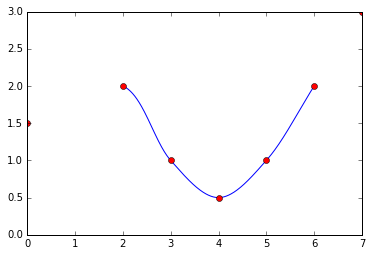

In [8]:
import numpy
import pylab as plt

def CatmullRomSpline(P0, P1, P2, P3, nPoints=100):
  """
  P0, P1, P2, and P3 should be (x,y) point pairs that define the Catmull-Rom spline.
  nPoints is the number of points to include in this curve segment.
  """
  # Convert the points to numpy so that we can do array multiplication
  P0, P1, P2, P3 = map(numpy.array, [P0, P1, P2, P3])

  # Calculate t0 to t4
  alpha = 0.5
  def tj(ti, Pi, Pj):
    xi, yi = Pi
    xj, yj = Pj
    return ( ( (xj-xi)**2 + (yj-yi)**2 )**0.5 )**alpha + ti

  t0 = 0
  t1 = tj(t0, P0, P1)
  t2 = tj(t1, P1, P2)
  t3 = tj(t2, P2, P3)

  # Only calculate points between P1 and P2
  t = numpy.linspace(t1,t2,nPoints)
  print(t)
  # Reshape so that we can multiply by the points P0 to P3
  # and get a point for each value of t.
  t = t.reshape(len(t),1)

  A1 = (t1-t)/(t1-t0)*P0 + (t-t0)/(t1-t0)*P1
  A2 = (t2-t)/(t2-t1)*P1 + (t-t1)/(t2-t1)*P2
  A3 = (t3-t)/(t3-t2)*P2 + (t-t2)/(t3-t2)*P3

  B1 = (t2-t)/(t2-t0)*A1 + (t-t0)/(t2-t0)*A2
  B2 = (t3-t)/(t3-t1)*A2 + (t-t1)/(t3-t1)*A3

  C  = (t2-t)/(t2-t1)*B1 + (t-t1)/(t2-t1)*B2
  return C

def CatmullRomChain(P):
  """
  Calculate Catmull Rom for a chain of points and return the combined curve.
  """
  sz = len(P)

  # The curve C will contain an array of (x,y) points.
  C = []
  for i in range(sz-3):
    c = CatmullRomSpline(P[i], P[i+1], P[i+2], P[i+3])
    C.extend(c)

  return C

# Define a set of points for curve to go through
Points = [[0,1.5],[2,2],[3,1],[4,0.5],[5,1],[6,2],[7,3]]

# Calculate the Catmull-Rom splines through the points
c = CatmullRomChain(Points)

# Convert the Catmull-Rom curve points into x and y arrays and plot
x,y = zip(*c)
plt.plot(x,y)

# Plot the control points
px, py = zip(*Points)
plt.plot(px,py,'or')

plt.show()

In [17]:
import numpy as np
def spline(P0, P1, P2, P3, nPoints=100):
    alpha = 0.5
    def tj(ti, Pi, Pj):
        xi, yi = Pi
        xj, yj = Pj
        return ( ( (xj-xi)**2 + (yj-yi)**2 )**0.5 )**alpha + ti

    t0 = 0
    t1 = tj(t0, P0, P1)
    t2 = tj(t1, P1, P2)
    t3 = tj(t2, P2, P3)

    # Only calculate points between P1 and P2
    t = numpy.linspace(t1,t2,nPoints)
    M = np.array([
            [2, -2, 1, 1],
            [-3, 3, -2, -1],
            [0, 0, 1, 0],
            [1, 0, 0, 0]
            ]);
    B = np.array([
            [P0[0], P0[1], 0, 0],
            [P1[0], P1[1], 0, 0],
            [P2[0], P2[1], 0, 0],
            [P3[0], P3[1], 0, 0],
        ])
    return [ np.array([u**3, u**2, u, 1]) * M * B for u in t]
        
def chain(P):
  """
  Calculate Catmull Rom for a chain of points and return the combined curve.
  """
  sz = len(P)

  # The curve C will contain an array of (x,y) points.
  C = []
  for i in range(sz-3):
    c = spline(P[i], P[i+1], P[i+2], P[i+3])
    print(c[0])
    C.extend(c)
    

c = chain(Points)


    
# Convert the Catmull-Rom curve points into x and y arrays and plot
x,y = zip(*c)
plt.plot(x,y)

# Plot the control points
px, py = zip(*Points)
plt.plot(px,py,'or')

plt.show()

[[  0.          -6.18465844   0.           0.        ]
 [-17.75999945  12.36931688  -0.          -0.        ]
 [  0.           0.           0.           0.        ]
 [ 11.83999963   0.           0.           0.        ]]
[[  6.72717132  -5.65685425   0.           0.        ]
 [-15.13613547   4.24264069  -0.          -0.        ]
 [  0.           0.           0.           0.        ]
 [  8.40896415   0.           0.           0.        ]]
[[  7.09306207  -2.23606798   0.           0.        ]
 [-14.18612414   1.67705098  -0.          -0.        ]
 [  0.           0.           0.           0.        ]
 [  7.09306207   0.           0.           0.        ]]
[[  9.45741609  -1.11803399   0.           0.        ]
 [-17.73265517   3.35410197  -0.          -0.        ]
 [  0.           0.           0.           0.        ]
 [  8.27523908   0.           0.           0.        ]]


TypeError: type object argument after * must be an iterable, not NoneType

In [25]:
P = np.random.random((4,4))

In [47]:
def catmull_rom(p1,p2,p3,p4, u):
    M = np.array([[0, 2, 0, 0],
                  [-1, 0, 1, 0],
                  [2, -5, 4, -1],
                  [-1, 3, -3, 1]])
    P = np.array([p1,p2,p3,p4])
    print(M*P)
    return np.array([0.5]) * np.array([1, u, u**2, u**3]) * M * P


print(catmull_rom(P[0], P[1], P[2], P[3], 0))

def catmull_rom(p0,p1,p2,p3,t):
    return (p1
        + np.array([0.5*t])*(-p0+p2)
        + np.array([0.5*t**2]) * (np.array([2])*p0
                                  -np.array([5])*p1
                                  +np.array([4])*p2
                                  -p3)
        + np.array([0.5*t**3]) * (-p0 + np.array([3])*p1-np.array([3])*p2 +p3)
        
        )

def catmull_rom(p0,p1,p2,p3,t):
    return p1 * np.array([1 ])

catmull_rom(P[0], P[1], P[2], P[3], 1), P[2]


[[ 0.          1.99419235  0.          0.        ]
 [-0.07720704  0.          0.71819343  0.        ]
 [ 0.6792304  -3.92170179  0.6848252  -0.59870242]
 [-0.63061515  2.81246547 -0.76780234  0.09735496]]
[[ 0.          0.          0.          0.        ]
 [-0.03860352  0.          0.          0.        ]
 [ 0.3396152  -0.          0.         -0.        ]
 [-0.31530757  0.         -0.          0.        ]]


In [16]:
from functools import partial
import numpy as np
import matplotlib.pyplot as plt

class memoize(object):
    """
       Cache the return value of a method
        
       This class is meant to be used as a decorator of methods. The return value
       from a given method invocation will be cached on the instance whose method
       was invoked. All arguments passed to a method decorated with memoize must
       be hashable.
        
       If a memoized method is invoked directly on its class the result will not
       be cached. Instead the method will be invoked like a static method:
       class Obj(object):
           @memoize
           def add_to(self, arg):
               return self + arg
       Obj.add_to(1) # not enough arguments
       Obj.add_to(1, 2) # returns 3, result is not cached
        
       Script borrowed from here:
       MIT Licensed, attributed to Daniel Miller, Wed, 3 Nov 2010
       http://code.activestate.com/recipes/577452-a-memoize-decorator-for-instance-methods/
    """
    def __init__(self, func):
        self.func = func
    def __get__(self, obj, objtype=None):
        if obj is None:
            return self.func
        return partial(self, obj)
    def __call__(self, *args, **kw):
        obj = args[0]
        try:
            cache = obj.__cache
        except AttributeError:
            cache = obj.__cache = {}
        key = (self.func, args[1:], frozenset(kw.items()))
        try:
            res = cache[key]
        except KeyError:
            res = cache[key] = self.func(*args, **kw)
        return res



class Bspline():
    """
       Numpy implementation of Cox - de Boor algorithm in 1D
       inputs:
           knot_vector: Python list or Numpy array containing knot vector 
                        entries
           order: Order of interpolation, e.g. 0 -> piecewise constant between 
                  knots, 1 -> piecewise linear between knots, etc.
       outputs:
           basis object that is callable to evaluate basis functions at given 
           values of knot span
    """
    
    def __init__(self, knot_vector, order):
        """Initialize attributes"""
        self.knot_vector = np.array(knot_vector)
        self.p = order

        #Dummy calls to the functions for memory storage
        self.__call__(0.0)
        self.d(0.0)
        
        
    def __basis0(self, xi):
        """Order zero basis"""
        return np.where(np.all([self.knot_vector[:-1] <=  xi, 
                                xi < self.knot_vector[1:]],axis=0), 1.0, 0.0)
    
    def __basis(self, xi, p, compute_derivatives=False):
        """
           Recursive Cox - de Boor function to compute basis functions and 
           optionally their derivatives
        """
        
        if p == 0:
            return self.__basis0(xi)
        else:
            basis_p_minus_1 = self.__basis(xi, p - 1)
        
        first_term_numerator = xi - self.knot_vector[:-p] 
        first_term_denominator = self.knot_vector[p:] - self.knot_vector[:-p]
        
        second_term_numerator = self.knot_vector[(p + 1):] - xi
        second_term_denominator = (self.knot_vector[(p + 1):] - 
                                   self.knot_vector[1:-p])
                
        
        #Change numerator in last recursion if derivatives are desired
        if compute_derivatives and p == self.p:
            
            first_term_numerator = p
            second_term_numerator = -p
            
        #Disable divide by zero error because we check for it
        with np.errstate(divide='ignore', invalid='ignore'):
            first_term = np.where(first_term_denominator != 0.0, 
                                  (first_term_numerator / 
                                   first_term_denominator), 0.0)
            second_term = np.where(second_term_denominator != 0.0,
                                   (second_term_numerator / 
                                    second_term_denominator), 0.0)
        
        return  (first_term[:-1] * basis_p_minus_1[:-1] + 
                 second_term * basis_p_minus_1[1:])
            
    
    @memoize
    def __call__(self, xi):
        """
           Convenience function to make the object callable.  Also 'memoized'
           for speed.
        """
        return self.__basis(xi, self.p, compute_derivatives=False)
    
    @memoize
    def d(self, xi):
        """
           Convenience function to compute derivate of basis functions.  
           'Memoized' for speed.
        """
        return self.__basis(xi, self.p, compute_derivatives=True)
    
    def plot(self):
        """
           Convenience function to plot basis functions over full 
           range of knots.
        """
        
        x_min = np.min(self.knot_vector)
        x_max = np.max(self.knot_vector)
        
        x = np.linspace(x_min, x_max, num=1000)
        
        N = np.array([self(i) for i in x]).T;
        
        plt.plot(x,N[0])
        #for n in N:
            #plt.plot(x,n)
        print(x.shape)
        return plt.show()
    
    def dplot(self):
        """
           Convenience function to plot derivatives of basis functions over 
           full range of knots.
        """
        
        x_min = np.min(self.knot_vector)
        x_max = np.max(self.knot_vector)
        
        x = np.linspace(x_min, x_max, num=1000)
        
        N = np.array([self.d(i) for i in x]).T;
        
        for n in N:
            
            plt.plot(x,n)
        print('x')
        return plt.show()

(1000,)


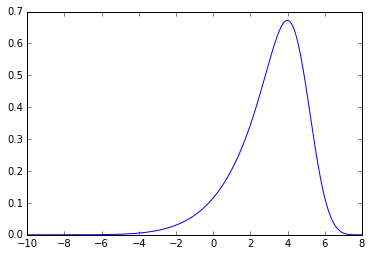

In [27]:
%matplotlib inline
Bspline([-10,1,3,4,5,6,8,8,8], 6).plot()


$$\otimes
\oplus$$